In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model, Input, layers, losses, optimizers, datasets
from matplotlib import pyplot as plt

In [3]:
(X, Y), (Xtest, Ytest) = datasets.mnist.load_data()

In [4]:
X = X.reshape((len(X), -1)).astype(np.float32) / 255.0
Xtest = Xtest.reshape((len(Xtest), -1)).astype(np.float32) / 255.0

In [5]:
# 784-392-196-98-196-392-784
inputs = Input(shape=X.shape[1])

en1 = layers.Dense(392, activation='relu')
en2 = layers.Dense(196, activation='relu')

en3 = layers.Dense(98, activation='relu')

de1 = layers.Dense(196, activation='relu')
de2 = layers.Dense(392, activation='relu')
de3 = layers.Dense(784, activation='relu')

outputs = de3(de2(de1(en3(en2(en1(inputs))))))

model = Model(inputs, outputs)


In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 196)               77028     
                                                                 
 dense_2 (Dense)             (None, 98)                19306     
                                                                 
 dense_3 (Dense)             (None, 196)               19404     
                                                                 
 dense_4 (Dense)             (None, 392)               77224     
                                                                 
 dense_5 (Dense)             (None, 784)               308112

In [7]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss=losses.MeanAbsoluteError())

In [33]:
model.fit(X, X, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0473
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0471
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0468
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0467
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0465
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0464
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0463
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0461
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0460
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0459
Epoch 11/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0458
Epoch 12/100
1875/1875 [==============================] - 8s 4ms/step - lo

In [34]:
# สร้างตัวที่ผ่านการ encode(feature extraction) มาก่อนเพื่อจะนำไปใช้ทดลอง reconstruction
Xtestencoded = en3(en2(en1(Xtest))).numpy()

In [35]:
Xtestencoded.shape

(10000, 98)

In [36]:
# ทำการ reconstruction ตัว encode เพื่อให้กลับไปเป็นมิติก่อนการทำ encode
Recon = de3(de2(de1(Xtestencoded))).numpy()
Recon.shape

(10000, 784)

In [37]:
# แปลง vector matrix ลับมาเป็น pixel
Recon = Recon.reshape(len(Recon), 28, 28)
Recon.shape

(10000, 28, 28)

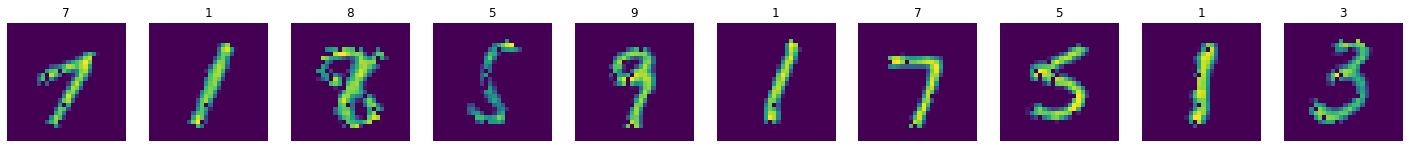

In [38]:
n = 10
plt.figure(figsize=(25, 25))
# สุ่มค่า integer ตั้งแต่ 0 จนถึง length ของ recon, สุ่มมา n ตัว
for index, item in enumerate(np.random.randint(0, len(Recon), n)):
    plt.subplot(1, n, index+1)
    plt.imshow(Recon[item])
    plt.title(Ytest[item])
    plt.axis('off')
plt.show()

In [39]:
# ถ้าไม่เอาตัว encode มาใส่ แต่จะใช้ตัว matrix random ที่มีความยาวเท่ากับ encode
# random แบบ uniform random มี n ตัว
n = 10
random_input = np.random.rand(n, Xtestencoded.shape[1]).astype(np.float32)
random_input.shape

(10, 98)

In [40]:
# decoder ตัวที่ทำการ random ขึ้นมา
random_decoded = de3(de2(de1(random_input))).numpy().reshape((n, 28, 28))
random_decoded.shape

(10, 28, 28)

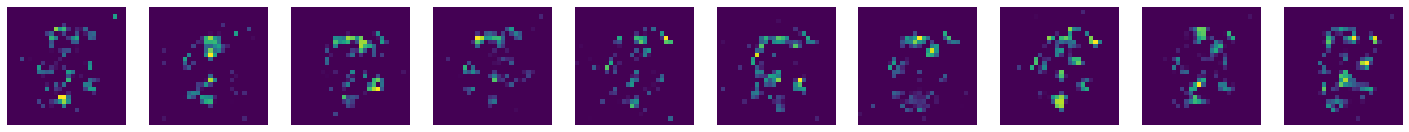

In [41]:
plt.figure(figsize=(25, 25))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(random_decoded[i])
    plt.axis('off')
plt.show()

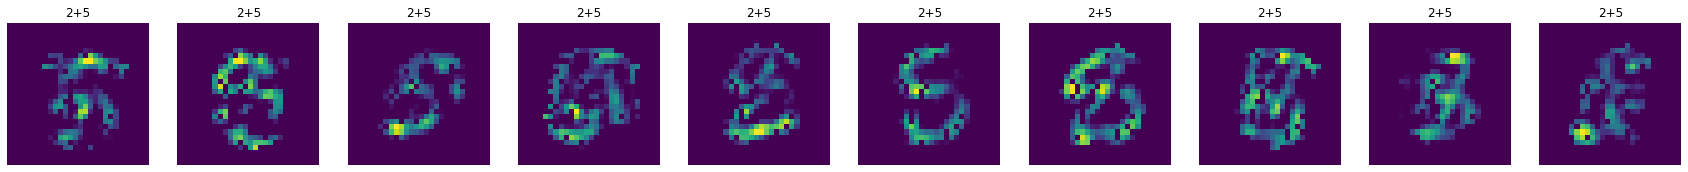

In [42]:
# ถ้าผสมเลขแบบ genetic cross เช่น 4 ผสมกับ 7 จะ reconstruction ได้ผลลัพธ์อย่างไร

p = [2, 5]
p1 = np.where(Ytest==p[0])[0] # หาว่าตัวไหนเป็น 2
p2 = np.where(Ytest==p[1])[0] # หาว่าตัวไหนเป็น 5
n = 10 # ใช้ 10 ตัว
plt.figure(figsize=(30, 30))
for index in range(n):
    temp = Xtestencoded[[np.random.choice(p1), np.random.choice(p2)]] # ดึงค่า encode แบบ random มาคู่กัน
    geneticCross = np.hstack((temp[0, :temp.shape[1] // 2], temp[1, temp.shape[1] // 2:])).reshape(1, temp.shape[1]) # เอามาต่อกัน โดย 49 ตัวแรกมาจาก p1 และ 49 ตัวหลังมาจาก p2
    Recon = de3(de2(de1(geneticCross))).numpy()
    Recon = Recon.reshape(len(Recon), 28, 28)[0] # ดึงตัวแรกออกมาเพื่อเอาไป plot เพราะยังเป็น array อยู่
    plt.subplot(1, n, index+1)
    plt.imshow(Recon)
    plt.title(str(p[0])+ '+' +str(p[1]))
    plt.axis('off')
plt.show()